In [16]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import cv2
import numpy as np

import glob
import matplotlib.pyplot as plt
import numpy as np


In [18]:

path_2x2 = "/content/drive/MyDrive/dataset/puzzle_2x2/*.jpg"

images_2x2 = sorted(glob.glob(path_2x2))

print("2x2 files:", len(images_2x2))

2x2 files: 110


In [19]:
grayscale_images = []

for img_path in images_2x2:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray)

print(f"Total images processed: {len(grayscale_images)}")


Total images processed: 110


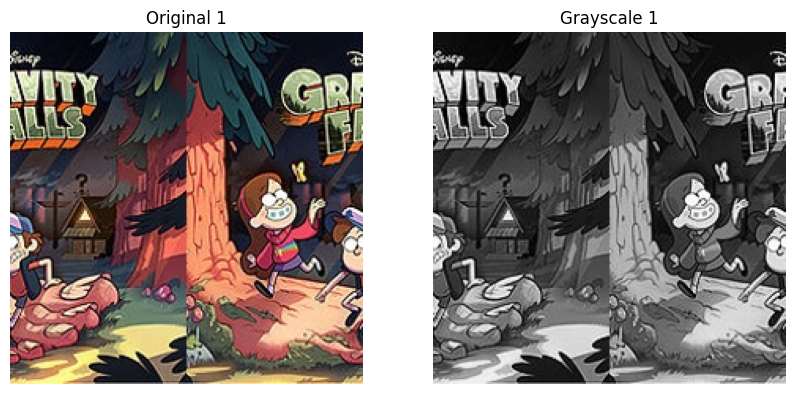

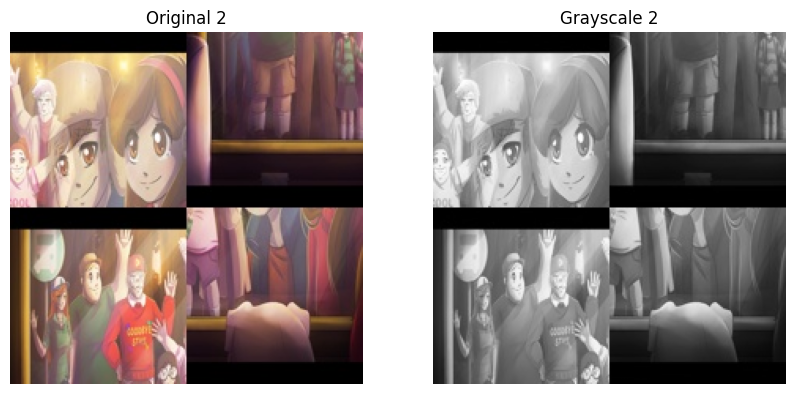

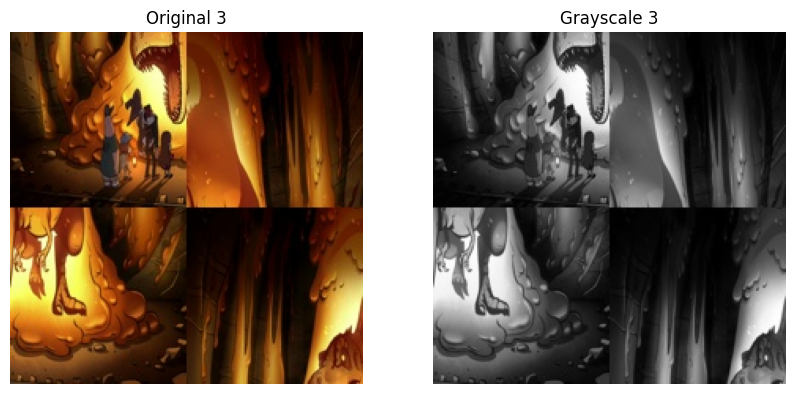

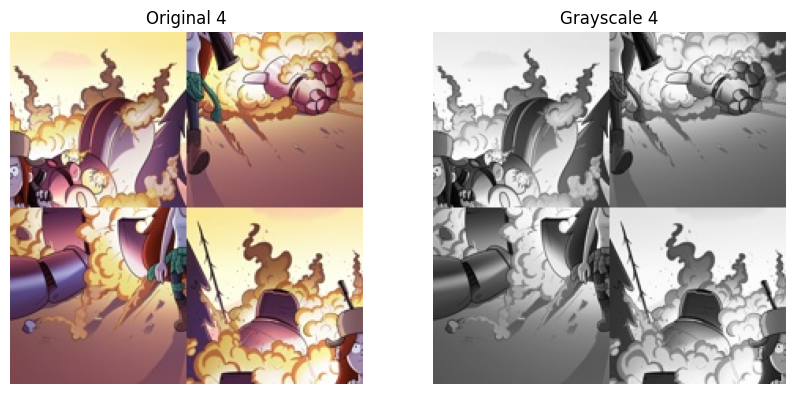

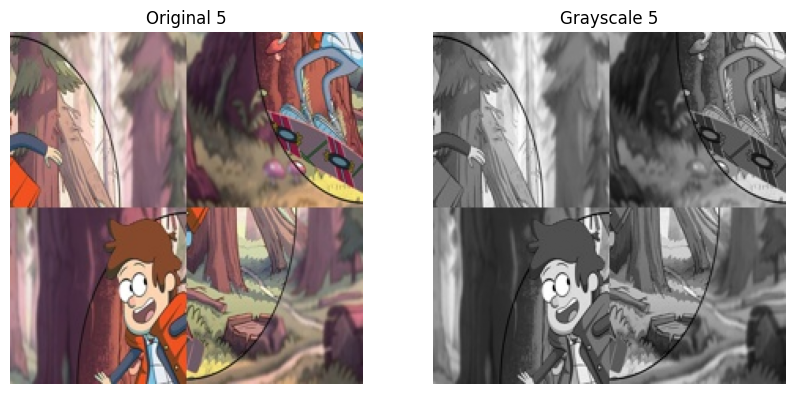

In [20]:
for i in range(5):
    img = cv2.imread(images_2x2[i])
    gray = grayscale_images[i]

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original {i+1}")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(gray, cmap="gray")
    plt.title(f"Grayscale {i+1}")
    plt.axis("off")

    plt.show()


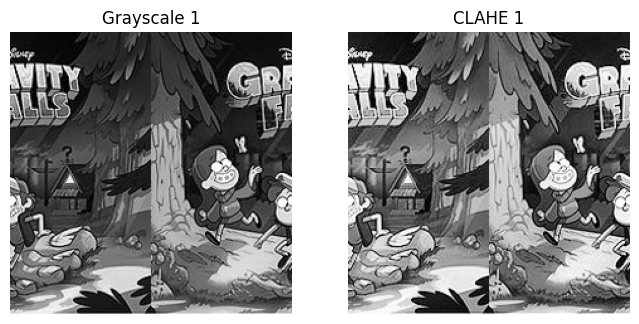

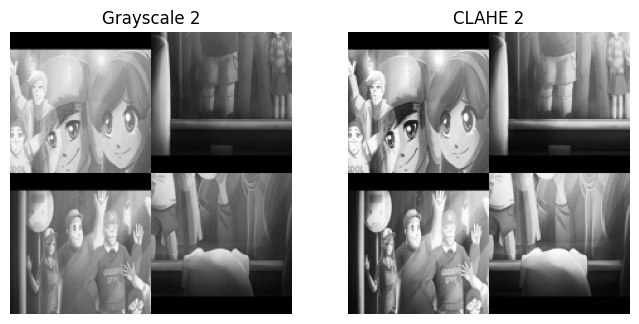

In [21]:
# Apply CLAHE to each grayscale image
clahe_images = []

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))  # you can adjust tileGridSize for small images

for gray in grayscale_images:
    enhanced = clahe.apply(gray)
    clahe_images.append(enhanced)

# Optional: visualize to check effect
import matplotlib.pyplot as plt

for i in range(2):
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(grayscale_images[i], cmap='gray')
    plt.title(f"Grayscale {i+1}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(clahe_images[i], cmap='gray')
    plt.title(f"CLAHE {i+1}")
    plt.axis('off')

    plt.show()


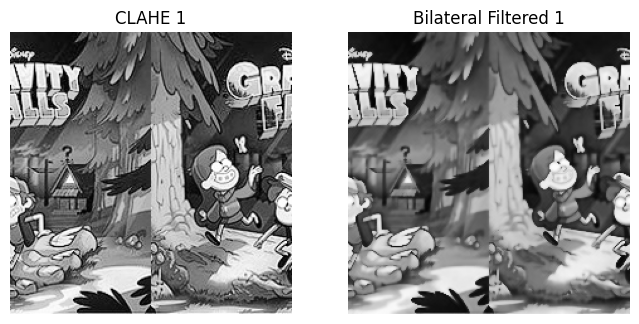

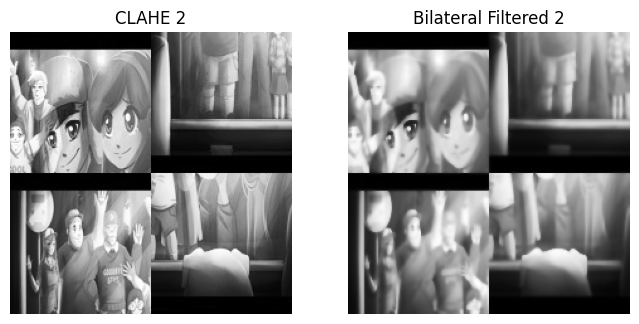

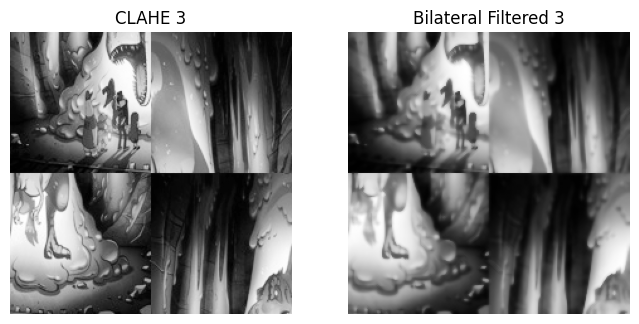

In [22]:
# Apply bilateral filter to CLAHE-enhanced images
smoothed_images = []

for img in clahe_images:
    smoothed = cv2.bilateralFilter(img, d=5, sigmaColor=75, sigmaSpace=75)  # adjust d and sigma values if needed
    smoothed_images.append(smoothed)

for i in range(3):  # only first 5 images
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(clahe_images[i], cmap='gray')
    plt.title(f"CLAHE {i+1}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.title(f"Bilateral Filtered {i+1}")
    plt.axis('off')

    plt.show()


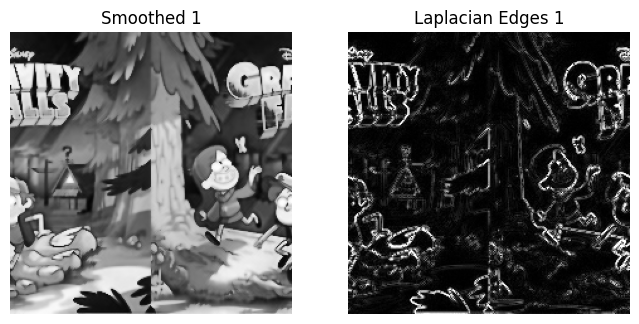

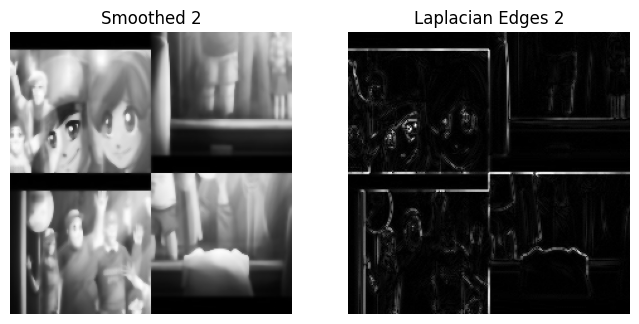

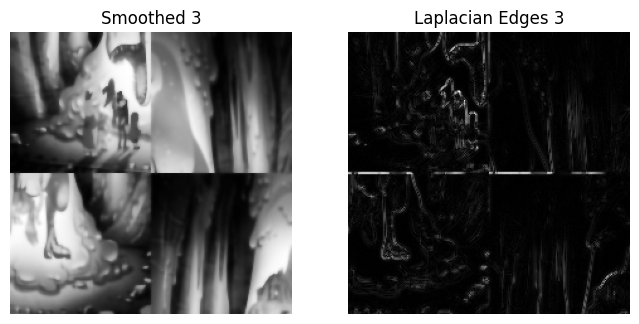

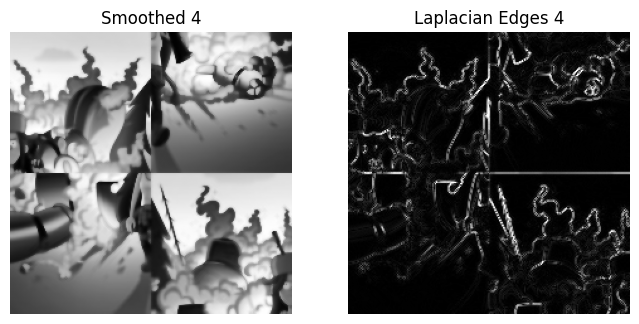

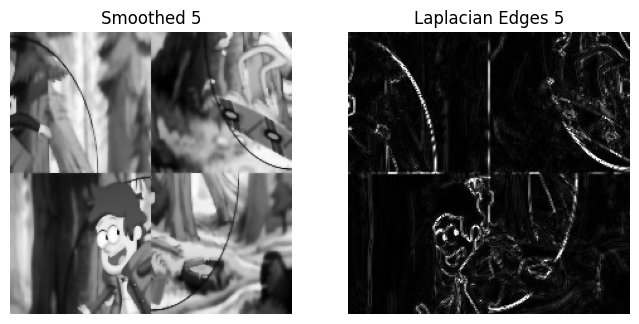

In [23]:
# Apply Laplacian edge detection
laplacian_images = []

for img in smoothed_images:
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    laplacian_images.append(laplacian)

# Visualize first 5 results
for i in range(5):
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.title(f"Smoothed {i+1}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(laplacian_images[i], cmap='gray')
    plt.title(f"Laplacian Edges {i+1}")
    plt.axis('off')

    plt.show()


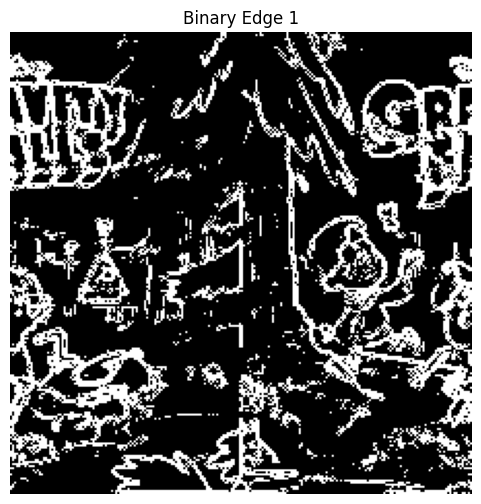

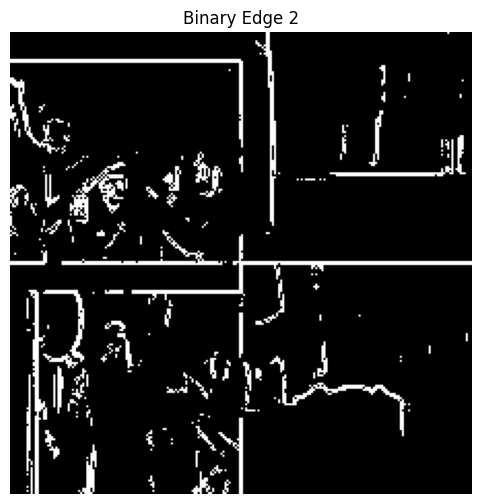

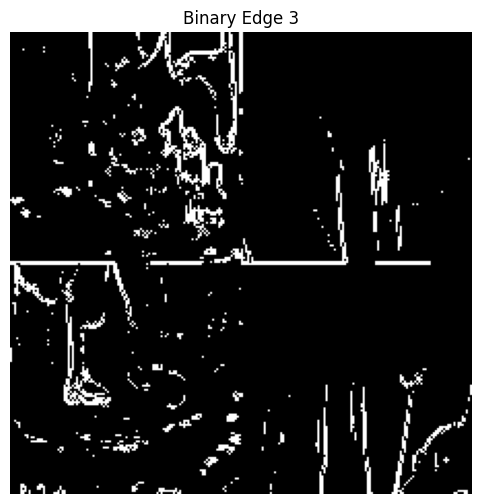

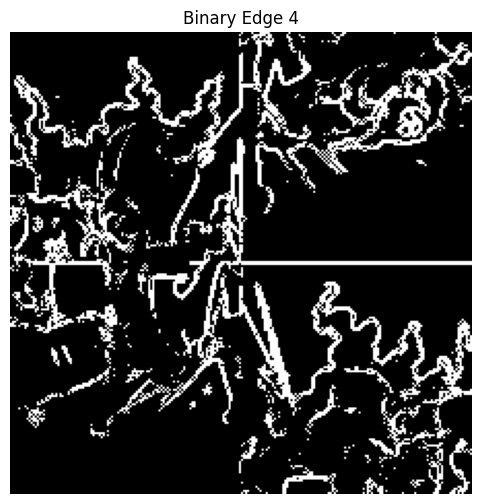

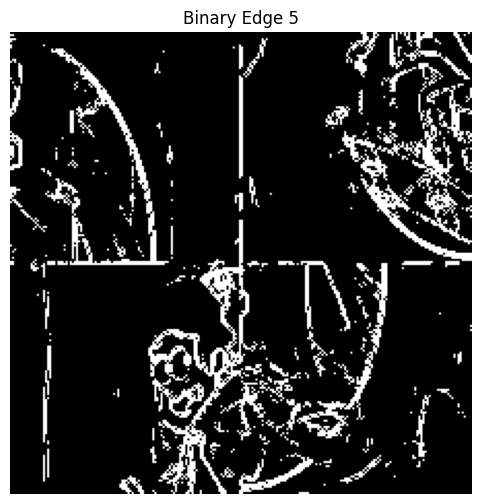

In [ ]:
binary_images = []

for lap in laplacian_images:
    _, binary = cv2.threshold(lap, 30, 255, cv2.THRESH_BINARY)  # 30 is threshold value, adjust if needed
    binary_images.append(binary)

# Visualize first 5
for i in range(5):
    plt.figure(figsize=(6,6))
    plt.imshow(binary_images[i], cmap='gray')
    plt.title(f"Binary Edge {i+1}")
    plt.axis('off')
    plt.show()



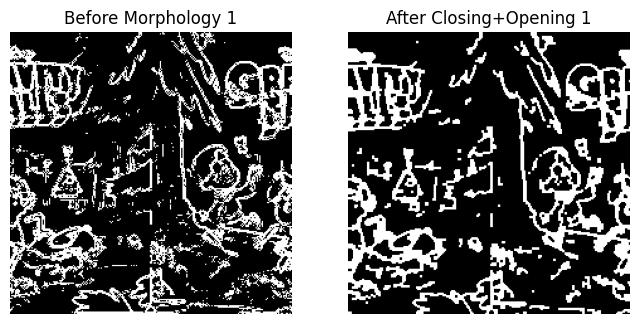

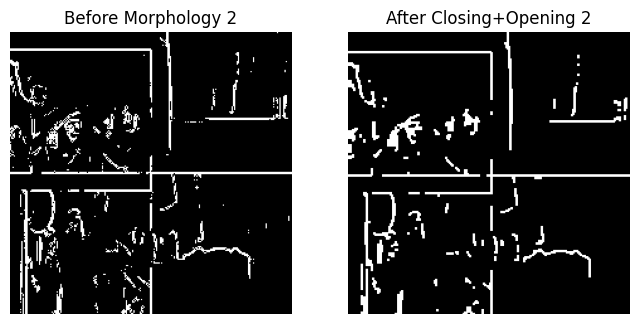

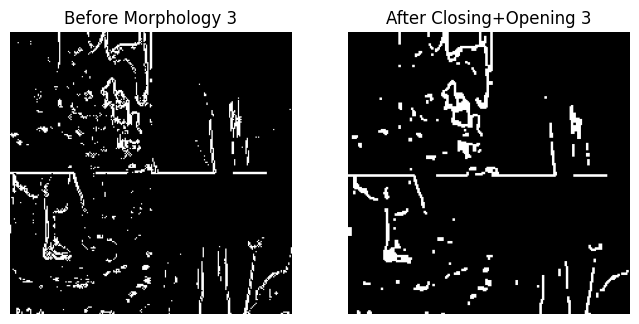

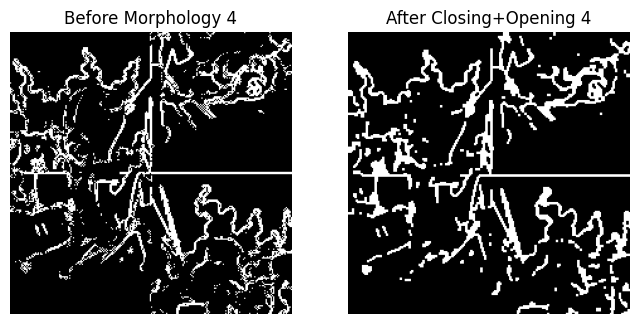

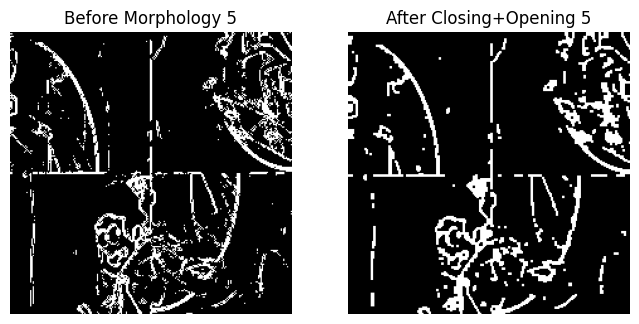

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define small kernel for tiny tiles
kernel = np.ones((2,2), np.uint8)

# Apply closing → opening to Laplacian thresholded images
cleaned_images = []
for binary in binary_images:  # binary_images after Laplacian + adaptive threshold
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    cleaned_images.append(opened)

# Visualize first 5 images: before and after morphological cleaning
for i in range(5):
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(binary_images[i], cmap='gray')
    plt.title(f"Before Morphology {i+1}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cleaned_images[i], cmap='gray')
    plt.title(f"After Closing+Opening {i+1}")
    plt.axis('off')

    plt.show()


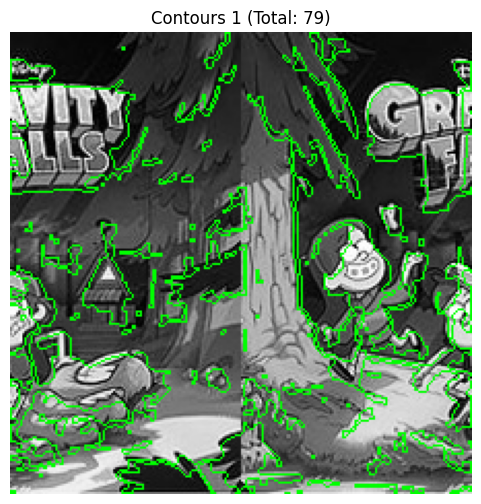

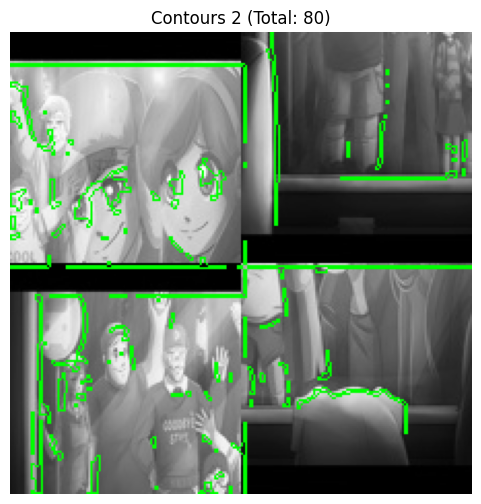

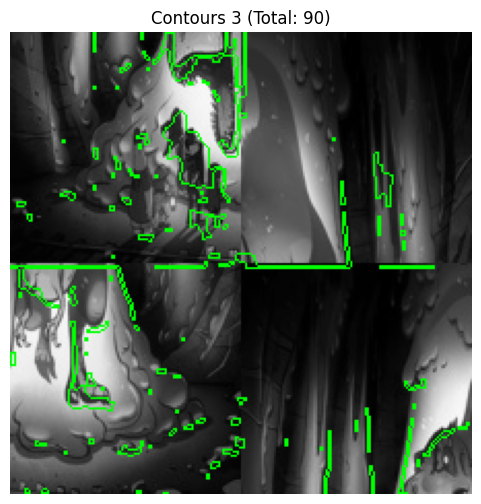

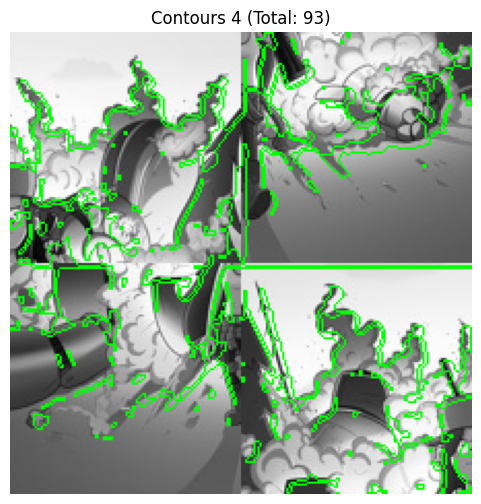

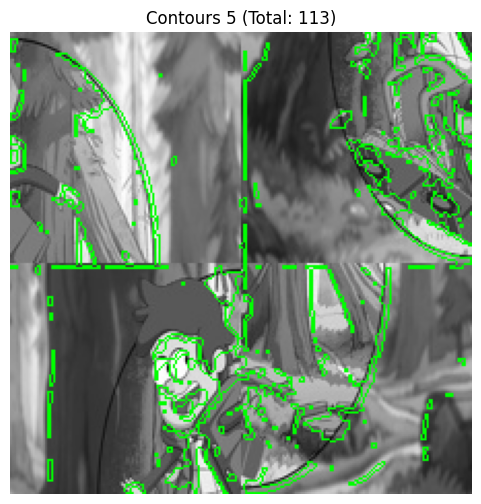

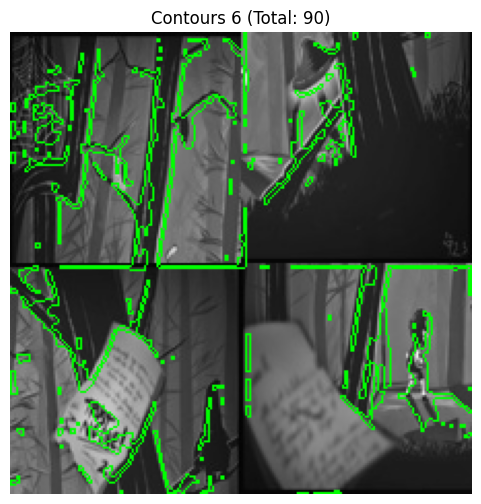

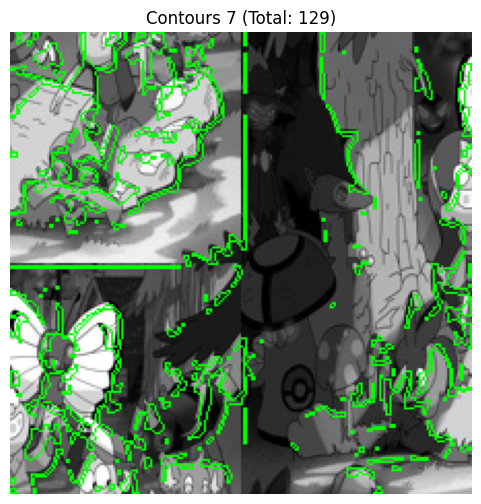

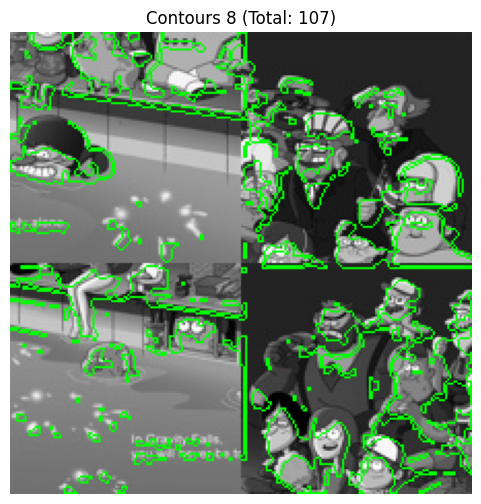

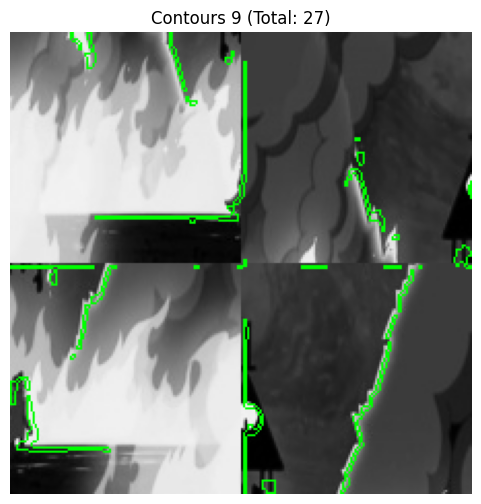

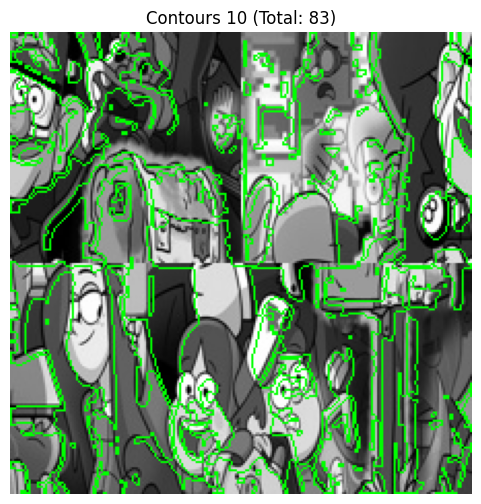

In [ ]:
all_contours = []
for img in cleaned_images:
    contours, hierarchy = cv2.findContours(
        img.copy(),
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )
    all_contours.append(contours)

# Visualize first 10 images with contours
for i in range(min(10, len(cleaned_images))):
    img_contours = cv2.cvtColor(grayscale_images[i], cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_contours, all_contours[i], -1, (0,255,0), 1)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title(f"Contours {i+1} (Total: {len(all_contours[i])})")
    plt.axis('off')
    plt.show()


In [ ]:
import os
import cv2

# Folder for final results only
output_dir = "/content/drive/MyDrive/results2x2"
os.makedirs(output_dir, exist_ok=True)

for idx in range(len(images_2x2)):

    # Convert grayscale → BGR for drawing green contours
    img_vis = cv2.cvtColor(grayscale_images[idx], cv2.COLOR_GRAY2BGR)

    # Draw all contours in green
    cv2.drawContours(img_vis, all_contours[idx], -1, (0,255,0), 1)

    # Save the final visualization
    save_path = os.path.join(output_dir, f"image_{idx+1:02d}_contours.png")
    cv2.imwrite(save_path, img_vis)

    print(f"Saved: {save_path}")

print("✓ All final contour visualizations saved in ONE folder (results2x2)")


Saved: /content/drive/MyDrive/results2x2/image_01_contours.png
Saved: /content/drive/MyDrive/results2x2/image_02_contours.png
Saved: /content/drive/MyDrive/results2x2/image_03_contours.png
Saved: /content/drive/MyDrive/results2x2/image_04_contours.png
Saved: /content/drive/MyDrive/results2x2/image_05_contours.png
Saved: /content/drive/MyDrive/results2x2/image_06_contours.png
Saved: /content/drive/MyDrive/results2x2/image_07_contours.png
Saved: /content/drive/MyDrive/results2x2/image_08_contours.png
Saved: /content/drive/MyDrive/results2x2/image_09_contours.png
Saved: /content/drive/MyDrive/results2x2/image_10_contours.png
Saved: /content/drive/MyDrive/results2x2/image_11_contours.png
Saved: /content/drive/MyDrive/results2x2/image_12_contours.png
Saved: /content/drive/MyDrive/results2x2/image_13_contours.png
Saved: /content/drive/MyDrive/results2x2/image_14_contours.png
Saved: /content/drive/MyDrive/results2x2/image_15_contours.png
Saved: /content/drive/MyDrive/results2x2/image_16_conto